<a href="https://colab.research.google.com/github/samuelrubert/pucrio-mvp-analisedados/blob/main/Analise_Rice_Cammeo_Osmancik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Pré-Processamento de Dados - Rice (Cammeo and Osmancik)

## Definição

O objetivo deste trabalho é realizar a etapa de análise e pré-processamento de um conjunto de dados que seria posteriormente utilizado em um projeto de ciência de dados.

Será utilizado o conjunto de dados Rice (Cammeo and Osmancik), que pode ser encontrado no repositório de machine learning da _University of California, Irvine_ (UCI), no endereço https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik.

O problema consiste na classificação de grãos de arroz entre duas espécies, Cammeo ou Osmancik, cultivadas na Turquia, de acordo com suas características morfológicas medidas por imagem. Trata-se de um problema de aprendizado supervisionado.

O conjunto de dados possui 3810 instâncias e os seguintes 8 atributos:


* **Area**: a quantidade de pixels na imagem do grão.
* **Perimeter**: o perímetro do grão, em pixels, calculado pelas distâncias entre os pixels da sua borda.
* **Major_Axis_Length**: tamanho da maior linha reta que pode ser desenhada dentro do grão. A unidade não foi especificada.
* **Minor_Axis_Length**: tamanho da menor linha reta que pode ser desenhada dentro do grão. A unidade não foi especificada.
* **Eccentricity**: a ecentricidade da elipse que melhor representa o grão. Quanto mais próximo de zero, mais redondo é o grão, e quanto mais próximo de um, mais alongado.
* **Convex_Area**: a quantidade de pixels da menor forma convexa que circunscreve o grão.
* **Extent**: a proporção entre a região do grão e a sua *bounding box* (o mínimo retângulo que contém a imagem do grão).
* **Class**: Cammeo ou Osmancik.

## Bibliotecas e configurações

Aqui instalamos a biblioteca ucimlrepo, que podemos usar para obter os dados diretamente do repositório da UCI, e importamos as bibliotecas utilitárias necessárias.

In [ ]:
pip install ucimlrepo --quiet

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing as skp
from sklearn import model_selection as skm

# Análise dos Dados


## Distribuição dos dados

Primeiramente vamos obter os dados diretamente da UCI e guardá-los num dataframe Pandas.

In [ ]:
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

rice_df = rice_cammeo_and_osmancik.data.original

Agora, vamos usar o comando describe para ver a contagem de valores em cada atributo e sua distribuição.

In [ ]:
rice_df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


Pode-ser ver que todos os valores do conjunto de dados estão preenchidos. Não será necessário realizar tratamento de valores nulos.

Além disso, a princípio, não se enxerga valores indevidos ou absurdos, como valores negativos ou excessivamente grandes.

Para visualizar essa distribuição de forma gráfica, vamos utilizar a bilioteca Seaborn e gerar um _boxplot_.

<Axes: >

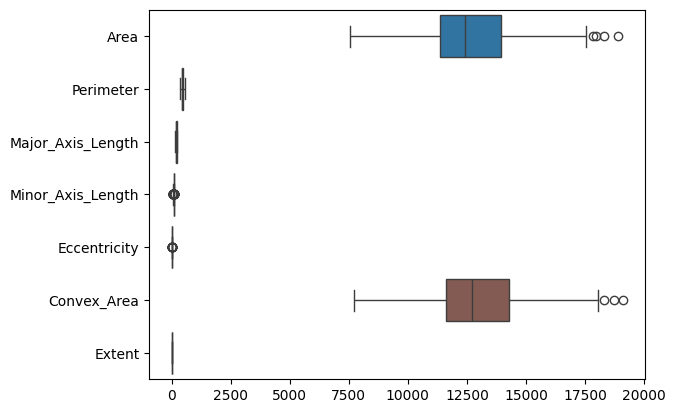

In [ ]:
# Boxplot na horizontal para melhor visualização dos atributos
sns.boxplot(rice_df, orient="h")

Logo percebemos que o boxplot não será muito útil para analisar todos os dados de uma vez.

Os atributos possuem faixas de valores muito distintas. Isso pode ser um incentivo para realizar uma padronização dos dados posteriormente.

Vamos separar os atributos em subgrupos com distribuições semelhantes e construir boxplots separados.

<Axes: >

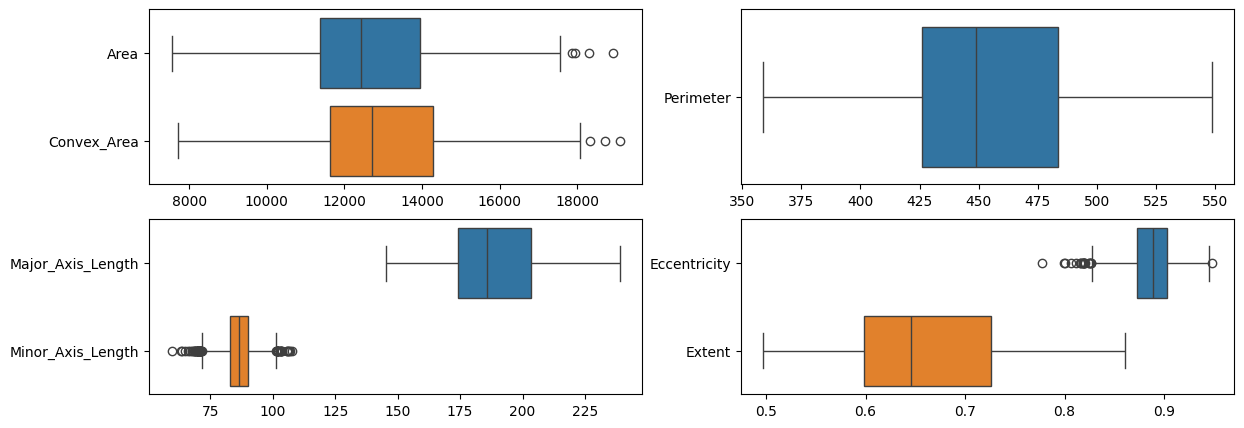

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(2,2,1)
df = rice_df.filter(["Area", "Convex_Area"])
sns.boxplot(df, orient="h")
plt.subplot(2,2,2)
df = rice_df.filter(["Perimeter"])
sns.boxplot(df, orient="h")
plt.subplot(2,2,3)
df = rice_df.filter(["Major_Axis_Length", "Minor_Axis_Length"])
sns.boxplot(df, orient="h")
plt.subplot(2,2,4)
df = rice_df.filter(["Eccentricity", "Extent"])
sns.boxplot(df, orient="h")

Agora com os gráficos separados, é possível ver que alguns atributos possuem outliers. Em especial, Minor_Axis_Length e Eccentricity parecem possuir muitos deles.

Vamos agora visualizar algumas linhas do início e do fim do conjunto de dados, e ver se encontramos algo de nota.

In [ ]:
pd.concat([rice_df.head(), rice_df.tail()])

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709992,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


A princípio não vislumbramos nada de especial, além do fato de que os dados parecem estar ordenados por classe. Isso não é um problema.

Já que falamos em classes, vamos usar um gráfico de barras para ver a distribuição de classes desses dados.

[]

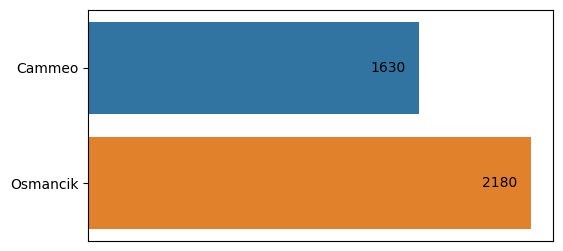

In [ ]:
plt.figure(figsize=(6,3))
ax = sns.countplot(rice_df, y="Class", hue="Class")
plt.bar_label(ax.containers[0], padding=-35)
plt.bar_label(ax.containers[1], padding=-35)

# Remover títulos e eixos para um gráfico mais limpo
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])

Podemos ver que as classes estão um pouco desbalanceadas. Porém, a razão de desbalanceamento é muito baixa (1,33:1), não necessitando de correção.

## Relações entre atributos

Vamos agora avaliar o relacionamento entre os atributos, criando e analisando um *pairplot* e um mapa de calor do conjunto de dados.

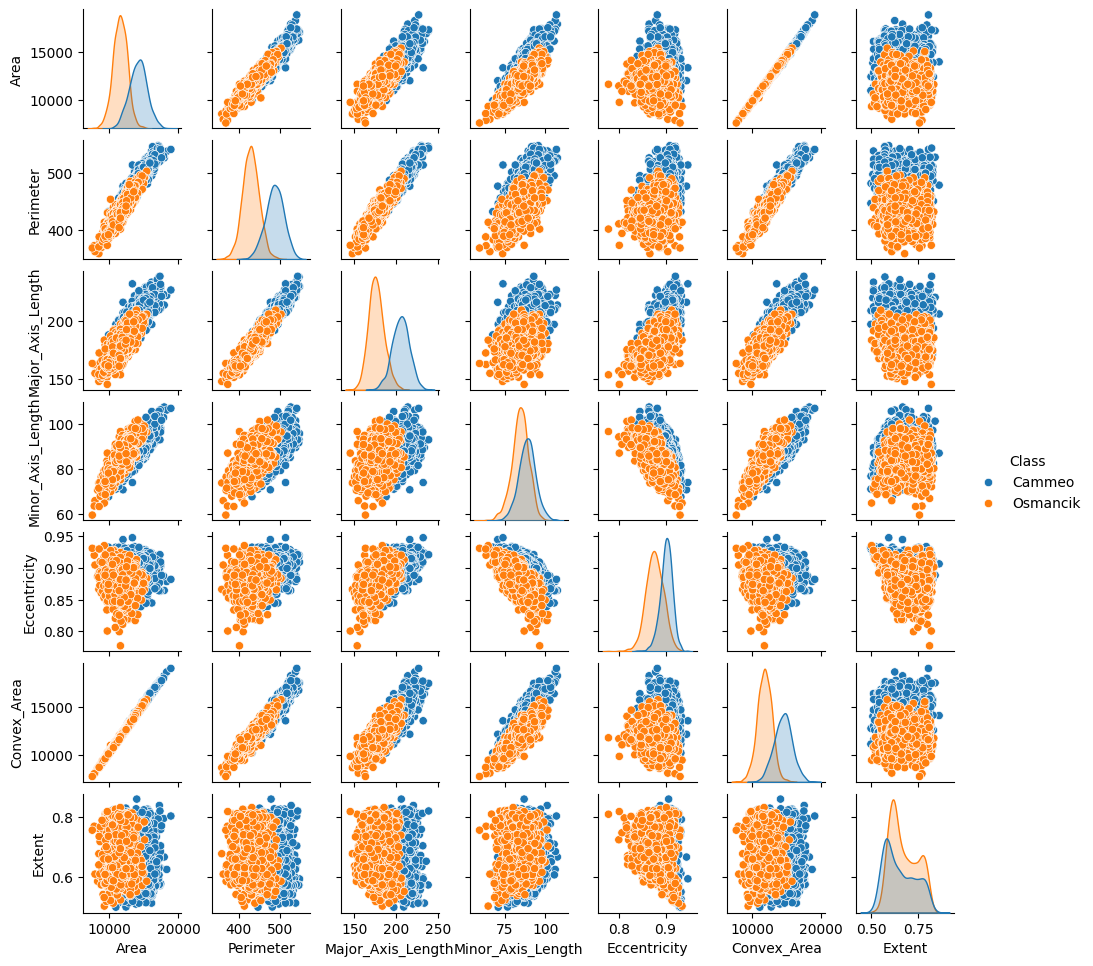

In [ ]:
# Pairplot colorido por classe
sns.pairplot(rice_df, height=1.4, hue="Class")

O *pairplot* nos permite fazer algumas observações.

Primeiramente, a maioria dos atributos parece ter uma distribuição próxima da normal. Isso não é uma surpresa, visto que representam características morfológicas naturais.

Além disso, alguns dos atributos parecem ter correlações altas, especialmente Area e Convex_Area, cuja correlação é quase uma reta.

Uma grande exceção é o atributo Extent, que não parece ter uma distribuição normal e tampouco uma correlação notável com qualquer outro atributo.

<Axes: >

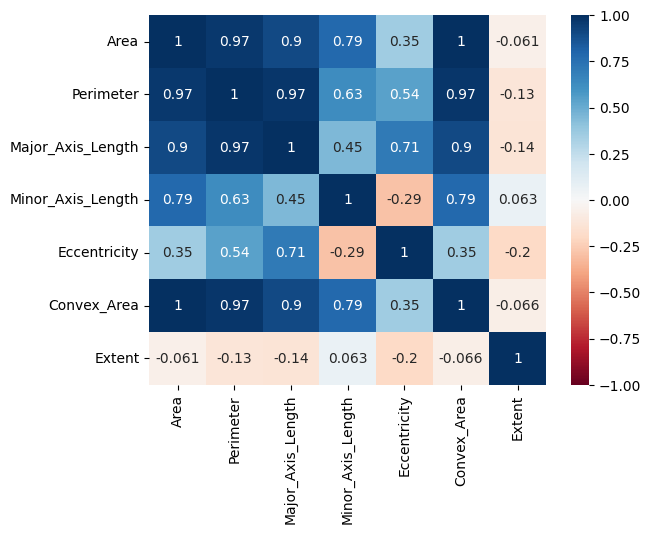

In [ ]:
# Heatmap, certificando de definir vmin=-1 para não distorcer a percepção do leitor com um mapa de cores assimétrico.
sns.heatmap(rice_df.drop("Class", axis=1).corr(), cmap="RdBu", annot=True, vmin=-1)

Com o mapa de calor, podemos ver que os atributos Area, Perimeter, Major_Axis_length e Convex_Area participam de correlações positivas muito fortes, e confirmamos que o atributo Extent parece não ter nenhuma correlação significativa.

## Conclusões

Com base nessas análises, selecionamos três procedimentos a realizar no conjunto de dados:

* **Seleção de características**:
    * **Convex_Area**: Este atributo tem uma correlação de 100% com Area. Os dois atributos são extremamente redundantes entre si: ambos medem a área do grão de arroz, porém de maneiras ligeiramente diferentes. Vamos remover Convex_Area, pois isso poderá simplificar os modelos sem grande perda.
    * **Extent**: A descrição desse atributo esclarece que se trata da proporção que a imagem do grão ocupa nos limites de sua *bounding box*. Um grão capturado na vertical ou na horizontal terá um Extent maior que o mesmo grão capturado na diagonal. Ou seja: este é um atributo do processo de visão computacional e não do grão de arroz em si. Vamos removê-lo.
    * **Perimeter**: Já desconsiderando Convex_Area e Extent, o perímetro do grão tem correlação de 97% com dois dos quatro atributos restantes, o que o torna muito redundante. Por isso, vamos removê-lo também.
* **Padronização**: Este procedimento foi escolhido por alguns motivos:
    * Os atributos estão em escalas muito diferentes, o que pode afetar a efetividade de alguns modelos de aprendizado de máquina.
    * Todos os atributos, já considerando a remoção do Extent, ocorrem em distribuição normal.
    * Alguns atributos possuem grandes outliers, o que torna a padronização preferível à normalização.
* **Encoding**: Como o atributo classe é composto por valores de texto, convém realizar uma codificação numérica para o trabalho dos modelos.

# Pré-Processamento dos Dados

## Seleção de características

Vamos remover os atributos definidos na etapa de análise. Será preservado o dataframe original, e criaremos um novo com as modificações.

In [ ]:
rice_df_selecionado = rice_df.drop(["Perimeter", "Convex_Area", "Extent"], axis=1)

## Separação de treino e teste

Aqui iremos separar os dados em conjuntos de treino e teste, dedicando 20% dos dados para teste. É importante realizar esta etapa antes da padronização dos dados, a fim de evitar vazamento de informação.

Um detalhe importante é que usaremos o parâmetro *stratify* para fazer uma divisão estratificada, mantendo a proporção entre as classes nos dois conjuntos.

In [ ]:
# Definir random_state para sempre obter resultados consistentes
rice_treino, rice_teste = skm.train_test_split(rice_df_selecionado, test_size=0.2, random_state=42, stratify=rice_df_selecionado["Class"])

Vamos apenas nos certificar de que a divisão ocorreu como deveria.

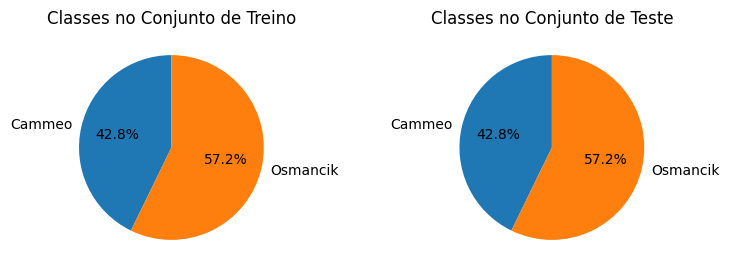

In [ ]:
plt.figure(figsize=(9, 3))

# Pizza de treino
class_counts = rice_treino['Class'].value_counts().sort_values()
plt.subplot(1, 2, 1)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Classes no Conjunto de Treino')

# Pizza de teste
class_counts = rice_teste['Class'].value_counts().sort_values()
plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Classes no Conjunto de Teste')

plt.show()

Como esperado, os dois conjuntos têm exatamente a mesma proporção entre as classes.

Além da separação entre treino e teste, vamos criar conjuntos separados para  os atributos de entrada e para o atributo alvo (classe). Essa divisão é comum para uso das bibliotecas de aprendizado supervisionado.

In [ ]:
rice_entrada_treino = rice_treino.drop("Class", axis=1)
rice_alvo_treino = rice_treino["Class"]
rice_entrada_teste = rice_teste.drop("Class", axis=1)
rice_alvo_teste = rice_teste["Class"]

## Padronização

Agora vamos realizar a padronização dos dados. A técnica correta envolve obter os parâmetros (média, desvio padrão) do conjunto de treino, e aplicar a padronização com esses parâmetros nos dois conjuntos.

In [ ]:
scaler = skp.StandardScaler()
scaler = scaler.fit(rice_entrada_treino)

rice_entrada_treino_padronizado = scaler.transform(rice_entrada_treino)
rice_entrada_teste_padronizado = scaler.transform(rice_entrada_teste)

## Encoding

Por fim, vamos aplicar o _encoding_ nos conjuntos de classes. Aplicaremos um _one-hot encoding_, que é adequado, por exemplo, para redes neurais com saída do tipo _softmax_.

In [ ]:
encoder = skp.OneHotEncoder(sparse_output=False)
encoder = encoder.fit(rice_alvo_treino.values.reshape(-1, 1))

rice_alvo_treino_encoded = encoder.transform(rice_alvo_treino.values.reshape(-1, 1))
rice_alvo_teste_encoded = encoder.transform(rice_alvo_teste.values.reshape(-1, 1))

# Finalização

## Dataframes

Aqui, vamos converter os dados de volta em _dataframes_, simplificando os nomes das variáveis, de forma a entregar os insumos para o projeto de ciência de dados. Vamos utilizar a nomenclatura padrão X e Y para representar, respectivamente, o conjunto de atributos de entrada e o conjunto alvo.

In [ ]:
rice_X_treino = pd.DataFrame(rice_entrada_treino_padronizado, columns=rice_entrada_treino.columns)
rice_X_teste = pd.DataFrame(rice_entrada_teste_padronizado, columns=rice_entrada_teste.columns)

rice_X_treino.head()

,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity
0,0.230942,-0.273192,0.926643,-0.933420
1,1.562939,1.320193,1.210373,0.534883
2,-0.808975,-1.033130,-0.158127,-1.004207
3,-0.156569,0.178910,-0.589728,0.712332
4,0.839970,1.037150,0.330018,0.849476


In [ ]:
rice_Y_treino = pd.DataFrame(rice_alvo_treino_encoded, columns=encoder.categories_[0])
rice_Y_teste = pd.DataFrame(rice_alvo_teste_encoded, columns=encoder.categories_[0])

rice_Y_treino.head()

,Cammeo,Osmancik
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


Além disso, vamos entregar também _dataframes_ de treino e teste com os dados completos, sem a separação entre X e Y.

In [ ]:
rice_treino = pd.concat([rice_X_treino, rice_Y_treino], axis=1)
rice_teste = pd.concat([rice_X_teste, rice_Y_teste], axis=1)

rice_treino.head()

,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Cammeo,Osmancik
0,0.230942,-0.273192,0.926643,-0.933420,0.0,1.0
1,1.562939,1.320193,1.210373,0.534883,1.0,0.0
2,-0.808975,-1.033130,-0.158127,-1.004207,0.0,1.0
3,-0.156569,0.178910,-0.589728,0.712332,0.0,1.0
4,0.839970,1.037150,0.330018,0.849476,1.0,0.0


Podemos ver todos os atributos restantes redimensionados em torno de zero, e as classes propriamente codificadas.

## Visualização final

Apenas para finalizar, vamos recriar o _pairplot_ e o mapa de calor com os dados tratados, e vamos ver se os dados se comportam como esperado. Vamos usar o conjunto de treino.

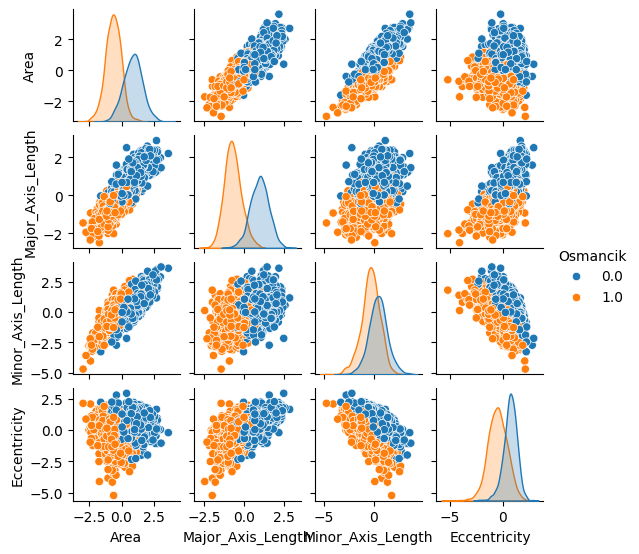

In [ ]:
# Usando a coluna Osmancik para colorir, de forma a manter o padrão visual anterior
sns.pairplot(rice_treino.drop("Cammeo", axis=1), height=1.4, hue="Osmancik")

<Axes: >

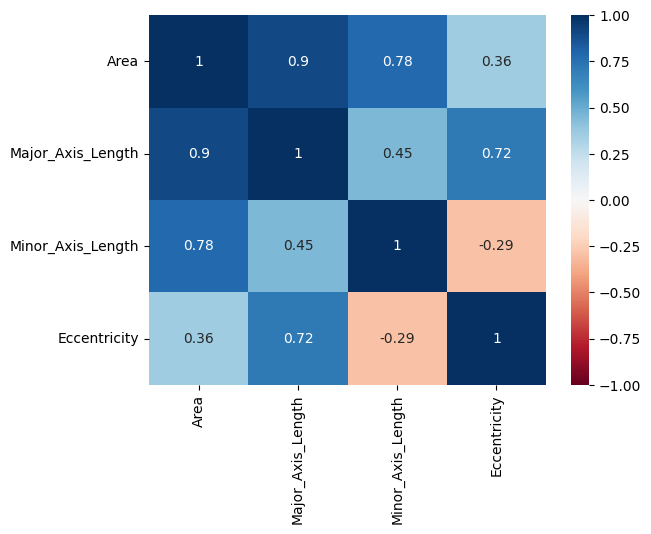

In [ ]:
sns.heatmap(rice_X_treino.corr(), cmap="RdBu", annot=True, vmin=-1)

O que vemos é que o formato das distribuições se manteve basicamente o mesmo, apenas deslocado em torno de zero, conforme esperado.

Ademais, a correlação entre os atributos também se manteve, apenas com pequenas diferenças que podem ser explicadas por estarmos avaliando agora apenas o conjunto de treino.

Com isso, são entregues os conjuntos de dados tratados conforme as técnicas de pré-processamento.

Esses dados estão prontos para ser utilizados num projeto de aprendizado supervisionado, para criar um modelo capaz de classificar novos grãos de arroz pela sua espécie.